In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data_folder = "gdrive/MyDrive/Facial Age"

In [ ]:
# Load image folders
Name = []
for file in os.listdir(data_folder):
    Name += [file]

N = []
for i in range(len(Name)):
    N += [i]
    
mapping = dict(zip(Name,N)) 
reverse_mapping = dict(zip(N,Name))

In [ ]:
Name

['005', '090', '035']

In [ ]:
# Load the images and preprocess them by turning them into arrays
imgs = []
label = []
original = []
folder_num = 0
for file in os.listdir(data_folder):
    image_path = os.path.join(data_folder,file)
    for pic in os.listdir(image_path):
        if pic[-4:] == '.png':
          image = load_img(os.path.join(image_path,pic), grayscale = False, color_mode = 'rgb', target_size = (224,224))
          image = img_to_array(image)
          original.append(image)
          image=image/255
          image=image.flatten()
          imgs.append(image)
          label.append(folder_num)
    folder_num += 1

In [ ]:
data=np.array(imgs)
label=np.array(label)

In [ ]:
def visualize_components(component1, component2, labels, show=True):

  plt.figure()
  cmap = plt.cm.get_cmap('tab10')
  plt.scatter(x=component1, y=component2, c=labels, cmap=cmap)
  plt.xlabel('Component 1')
  plt.ylabel('Component 2')
  plt.colorbar(ticks=range(10))
  plt.clim(-0.5, 9.5)
  if show:
    plt.show()

**Test** **Data** 

In [ ]:
test_data_folder = "gdrive/MyDrive/test"

In [ ]:
tests_img = []
labels=[]
test_num = 0
for file in os.listdir(test_data_folder):
    image_path = os.path.join(test_data_folder,file)
    for pic in os.listdir(image_path):
        if pic[-4:] == '.png':
          image = load_img(os.path.join(image_path,pic), grayscale=False, color_mode='rgb', target_size=(224,224))
          image = img_to_array(image)
          image=image/255
          image=image.flatten()
          tests_img.append(image)
          labels.append(test_num)
    test_num += 1

In [ ]:
tests = np.array(tests_img)

In [ ]:
test_05_f = "gdrive/MyDrive/test/05"
valid_images = [".jpg",".gif",".png",".tga"]
test_05 = []
test_05_original=[]
for f in os.listdir(test_05_f):
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue
    i = img_to_array(load_img(os.path.join(test_05_f,f),grayscale=False, color_mode='rgb', target_size=(224,224)))
    test_05_original.append(i)
    i = i/255
    i = i.flatten()    
    test_05.append(i)

In [ ]:
test_35_f = "gdrive/MyDrive/test/35"
test_35 = []
test_35_original=[]
for f in os.listdir(test_35_f):
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue
    i = img_to_array(load_img(os.path.join(test_35_f,f),grayscale=False, color_mode='rgb', target_size=(224,224)))
    test_35_original.append(i)
    i = i/255
    i = i.flatten()    
    test_35.append(i)

In [ ]:
test_90_f = "gdrive/MyDrive/test/90"
test_90 = []
test_90_original=[]
for f in os.listdir(test_90_f):
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue
    i = img_to_array(load_img(os.path.join(test_90_f,f),grayscale=False, color_mode='rgb', target_size=(224,224)))
    test_90_original.append(i)
    i = i/255
    i = i.flatten()    
    test_90.append(i)

## PCA

In [ ]:
# PCA with 2 components
pca_model = PCA(n_components = 2)
pca_model.fit(data)

In [ ]:
scores = pca_model.transform(data)

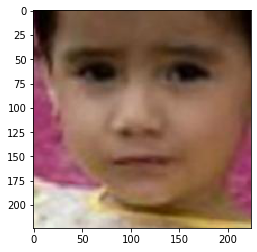

In [ ]:
plt.imshow(imgs[0].reshape(224,224,3))

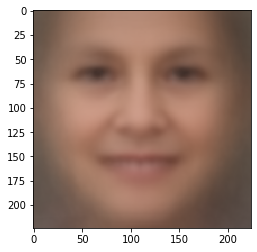

In [ ]:
plt.imshow(pca_model.inverse_transform(scores[0]).reshape(224,224,3))

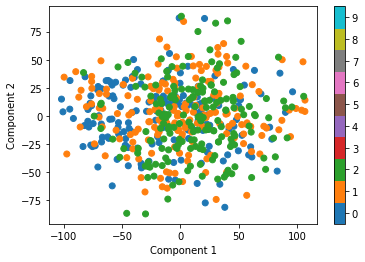

In [ ]:
visualize_components(scores[:,0], scores[:,1],label)

### TSNE

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


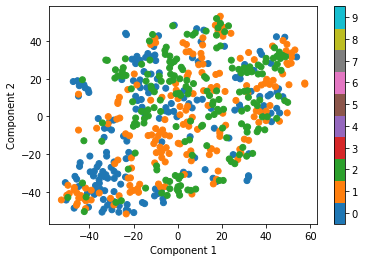

In [ ]:
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, perplexity=10, random_state=2020,n_iter=5000) 
embed = tsne_model.fit_transform(data)
visualize_components(embed[:, 0], embed[:, 1], label)

We find that if we reduce the dimension to 2 it's almost impossible to classify into different cluster, so we try to reduce it to 20 dimension and test it by test data

In [ ]:
pca20_model = PCA(n_components = 20)
pca20_model.fit(data)

PCA(n_components=20)

In [ ]:
kmeans_20 = KMeans(
         init="random",
         n_clusters=3,
         n_init=10,
         max_iter=300,
         random_state=42
    )

In [ ]:
x=pca20_model.transform(data)
kmeans_20.fit(x)

KMeans(init='random', n_clusters=3, random_state=42)

In [ ]:
identified_clusters = kmeans_20.predict(x)
identified_clusters

array([0, 0, 1, 1, 2, 2, 2, 2, 0, 0, 1, 1, 2, 1, 1, 2, 0, 0, 1, 2, 1, 1,
       1, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 1, 2, 0, 1, 1, 2, 1, 2, 1, 2, 2,
       2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 1, 1, 1, 0, 1, 2, 0, 0, 1, 1, 2,
       2, 2, 0, 2, 1, 1, 1, 0, 0, 2, 1, 0, 2, 1, 2, 0, 2, 2, 1, 1, 1, 0,
       0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1,
       1, 1, 2, 1, 1, 0, 1, 2, 1, 2, 2, 0, 0, 1, 0, 2, 2, 2, 0, 2, 0, 1,
       1, 2, 1, 0, 1, 1, 1, 2, 2, 2, 0, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1,
       1, 1, 1, 0, 2, 0, 2, 1, 2, 2, 2, 0, 1, 0, 2, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 1, 2, 1, 0, 0,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 0, 2, 1, 0, 1, 1,
       0, 2, 2, 0, 0, 0, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 0, 0,
       2, 1, 2, 1, 2, 1, 2, 0, 1, 1, 2, 1, 2, 2, 0, 1, 1, 2, 2, 2, 1, 0,
       0, 2, 0, 1, 2, 1, 2, 2, 1, 2, 0, 1, 1, 2, 0, 1, 1, 1, 2, 0, 2, 0,
       1, 2, 1, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0,

In [ ]:
count=[0,0,0]
print("cluster 0")
for i in range(len(identified_clusters)):
  if identified_clusters[i]==0:
    count[label[i]]+=1
count

cluster 0


[39, 49, 59]

cluster 0


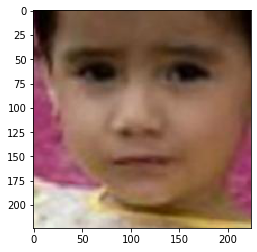

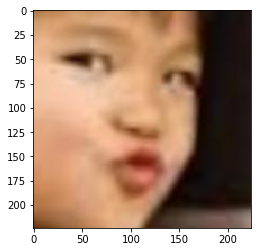

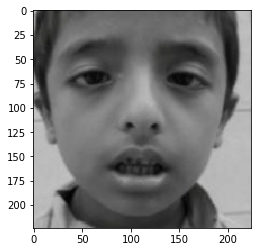

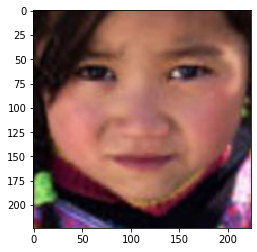

In [ ]:
c0=0
print("cluster 0")
for i in range(len(identified_clusters)):
  if(identified_clusters[i]==0) and (c0<5):
    plt.figure()
    plt.imshow(data[i].reshape(224,224,3))
    c0+=1
  if(c0==4):
    break
plt.show()

In [ ]:
count=[0,0,0]
print("cluster 1")
for i in range(len(identified_clusters)):
  if identified_clusters[i]==1:
    count[label[i]]+=1
count

cluster 1


[78, 56, 43]

cluster 1


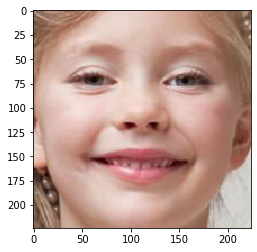

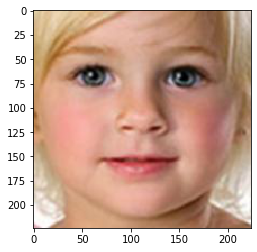

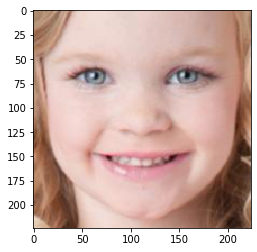

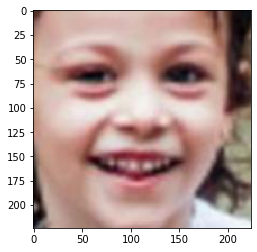

In [ ]:
c1=0
print("cluster 1")
for i in range(len(identified_clusters)):
  if(identified_clusters[i]==1) and (c1<5):
    plt.figure()
    plt.imshow(data[i].reshape(224,224,3))
    c1+=1
  if(c1==4):
    break
plt.show()

In [ ]:
count=[0,0,0]
print("cluster 2")
for i in range(len(identified_clusters)):
  if identified_clusters[i]==2:
    count[label[i]]+=1
count

cluster 2


[63, 76, 81]

cluster 2


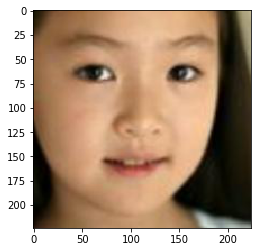

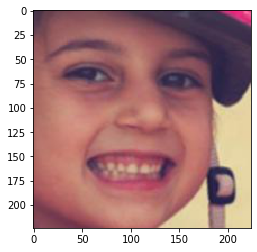

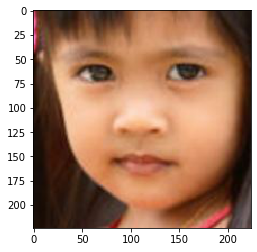

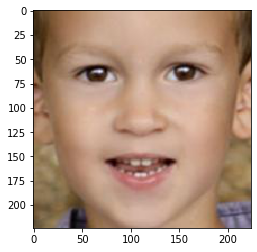

In [ ]:
c2=0
print("cluster 2")
for i in range(len(identified_clusters)):
  if(identified_clusters[i]==2) and (c2<5):
    plt.figure()
    plt.imshow(data[i].reshape(224,224,3))
    c2+=1
  if(c2==4):
    break
plt.show()

We find that cluster 0  are mostly label 0, label 2 are mostly in cluster 1. We want to test it.

In [ ]:
total35=len(test_35)
correct=0
count=[0,0,0]
for i in range(len(test_35)):
  x=pca20_model.transform(test_35[i].reshape(1,-1))
  y=kmeans_20.predict(x)
  count[y.item()]+=1
count

[7, 5, 8]

In [ ]:
count=[0,0,0]
for i in range(len(test_05)):
  x=pca20_model.transform(test_05[i].reshape(1,-1))
  y=kmeans_20.predict(x)
  if y==0:
    count[0]+=1
for i in range(len(test_35)):
  x=pca20_model.transform(test_35[i].reshape(1,-1))
  y=kmeans_20.predict(x)
  if y==0:
    count[1]+=1
for i in range(len(test_90)):
  x=pca20_model.transform(test_90[i].reshape(1,-1))
  y=kmeans_20.predict(x)
  if y==0:
    count[2]+=1
count

[4, 7, 6]

## K means

In [ ]:
kmeans = KMeans(
         init="random",
         n_clusters=3,
         n_init=10,
         max_iter=300,
         random_state=42
    )

In [ ]:
kmeans.fit(data)
identified_clusters = kmeans.fit_predict(data)
identified_clusters

array([2, 2, 0, 0, 1, 1, 1, 1, 2, 2, 0, 0, 1, 0, 0, 1, 2, 2, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 0, 1, 2, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 0, 0, 0, 2, 0, 1, 2, 2, 0, 0, 1,
       1, 1, 2, 1, 0, 0, 0, 2, 2, 1, 0, 2, 1, 0, 1, 2, 1, 1, 0, 0, 0, 2,
       2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 2, 0, 1, 0, 1, 1, 2, 2, 0, 2, 1, 1, 1, 2, 1, 2, 0,
       0, 1, 0, 2, 0, 0, 0, 1, 1, 1, 2, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 2, 1, 2, 1, 0, 1, 1, 1, 2, 0, 2, 1, 0, 0, 0, 0, 2, 0, 2,
       2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 2, 1, 0, 2, 0, 0,
       2, 1, 1, 2, 2, 2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 2, 2,
       1, 0, 1, 0, 1, 0, 1, 2, 0, 0, 1, 0, 1, 1, 2, 0, 0, 1, 1, 1, 0, 2,
       2, 1, 2, 0, 1, 0, 1, 1, 0, 1, 2, 0, 0, 1, 2, 0, 0, 0, 1, 2, 1, 2,
       0, 1, 0, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2,

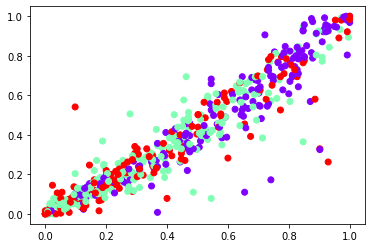

In [ ]:
data_with_clusters = data.copy()
data_with_clusters[:,2] = identified_clusters 
plt.scatter(data_with_clusters[:,0],data_with_clusters[:,1],c=data_with_clusters[:,2],cmap='rainbow')

In [ ]:
def calcSqDistances(X, Kmus):
    N,K = X.shape[0], Kmus.shape[0]
    sq_dis = np.zeros((N,K), dtype = np.float32)
    for i in range(N):
        for j in range(K):
            sq_dis[i,j] = np.linalg.norm(X[i] - Kmus[j])
    return sq_dis

In [ ]:
def determineRnk(sqDmat):
    Rnk = np.zeros((sqDmat.shape))
    for i in range(len(sqDmat)): 
        m = np.argmin(sqDmat[i])
        Rnk[i, m] = 1
    return Rnk

In [ ]:
def recalcMus(X, Rnk):
    K = Rnk.shape[1]
    D = X.shape[1]
    Kmus_new = np.zeros((K,D))
    return np.divide(X.T @ Rnk, np.sum(Rnk, axis = 0)).T

In [ ]:
def runKMeans(K):
   
    X = data
    N, D = X.shape

    Kmus = np.zeros((K, D))

    rand_inds = np.random.permutation(N)
    Kmus = X[rand_inds[0:K],:]

    maxiters = 1000

    for iter in range(maxiters):
        sqDmat = calcSqDistances(X, Kmus)

        Rnk = determineRnk(sqDmat)

        KmusOld = Kmus

        Kmus = recalcMus(X, Rnk)

        if np.sum(np.abs(KmusOld.reshape((-1, 1)) - Kmus.reshape((-1, 1)))) < 1e-6:
            break

        return Kmus

In [ ]:
def get_cluster_plot(Kmus): 
    '''
    : get a plot of what different clusters represent
    : takes as input the cluster location matrix
    '''
    n = int(Kmus.shape[0])
    fig,axs = plt.subplots(3,3, figsize = (15,9))
    for i in range(len(Kmus)):
        cluster = Kmus[i].reshape(28,-1) * 255
        axs[i//5][i%5].imshow(cluster, cmap = plt.cm.binary)
        axs[i//5][i%5].set_title(f'Cluster {i + 1}')
    fig.tight_layout()    

In [ ]:
Kmus_3 = runKMeans(3)

In [ ]:
Kmus_3.shape

(3, 150528)

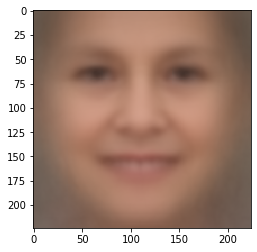

In [ ]:
plt.imshow(Kmus_3[0].reshape(224,224,3))

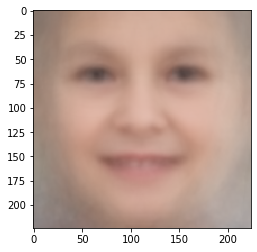

In [ ]:
plt.imshow(Kmus_3[1].reshape(224,224,3))

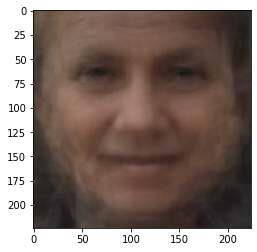

In [ ]:
plt.imshow(Kmus_3[2].reshape(224,224,3))

### CNN resnet50

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models

In [ ]:
model_s=models.resnet50(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [ ]:
original=torch.tensor(original)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  """Entry point for launching an IPython kernel.


In [ ]:
original.shape

torch.Size([544, 224, 224, 3])

In [ ]:
original=original.permute(0,3,1,2)

In [ ]:
original.shape

torch.Size([544, 3, 224, 224])

In [ ]:
output=[]
for i in range(original.shape[0]):
  with torch.no_grad():
   temp=model_s(original[i].reshape((1,3,224,224))).squeeze(0)
   output.append(list(temp))
   

In [ ]:
output=np.array(output)
output.shape

(544, 1000)

In [ ]:
scores2 = pca_model.fit_transform(output)

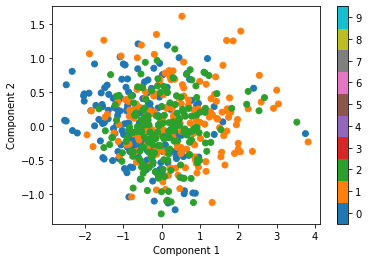

In [ ]:
visualize_components(scores2[:,0], scores2[:,1],label)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


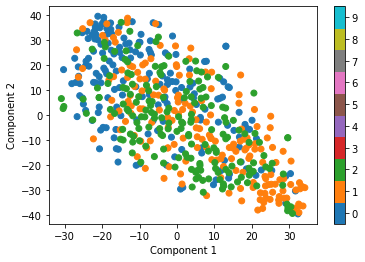

In [ ]:
tsne_model2 = TSNE(n_components=2, perplexity=15) 
embed2 = tsne_model2.fit_transform(output)
visualize_components(embed2[:, 0], embed2[:, 1], label)

In [ ]:
pca20_2 = PCA(n_components = 20)
pca20_2.fit(output)

PCA(n_components=20)

In [ ]:
kmeans_20_2 = KMeans(
         init="random",
         n_clusters=3,
         n_init=10,
         max_iter=300,
         random_state=42
    )

In [ ]:
x2=pca20_2.transform(output)

In [ ]:
kmeans_20_2.fit(x2)

KMeans(init='random', n_clusters=3, random_state=42)

In [ ]:
identified_clusters = kmeans_20_2.predict(x2)
identified_clusters

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 2, 0, 1, 2, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 0, 0, 2,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 1, 0, 1, 0, 0, 1, 0, 2, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 2, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 2,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 0, 1, 1, 2, 1, 2, 2,
       0, 2, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 2, 0, 0, 1, 2, 1, 0, 0, 2,
       1, 0, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 2,
       2, 0, 2, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 2, 0, 2, 1, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 1, 2, 2, 0, 1, 0, 2, 1, 2, 2, 1, 2, 1, 2,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0,

In [ ]:
count=[0,0,0]
print("cluster 0")
for i in range(len(identified_clusters)):
  if identified_clusters[i]==0:
    count[label[i]]+=1
count

cluster 0


[84, 84, 120]

cluster 0


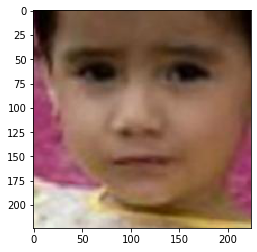

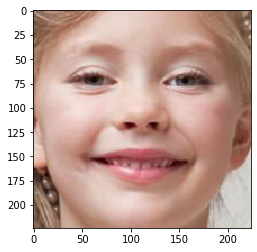

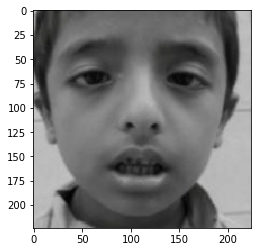

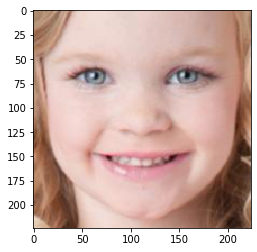

In [ ]:
c0=0
print("cluster 0")
for i in range(len(identified_clusters)):
  if(identified_clusters[i]==0) and (c0<5):
    plt.figure()
    plt.imshow(data[i].reshape(224,224,3))
    c0+=1
  if(c0==4):
    break
plt.show()

In [ ]:
count=[0,0,0]
print("cluster 1")
for i in range(len(identified_clusters)):
  if identified_clusters[i]==1:
    count[label[i]]+=1
count

cluster 1


[82, 32, 30]

cluster 1


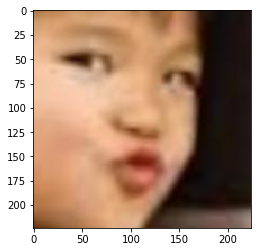

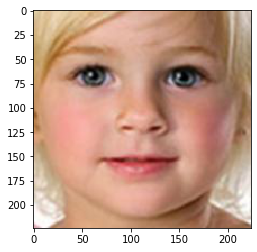

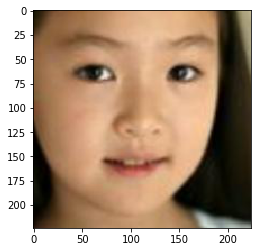

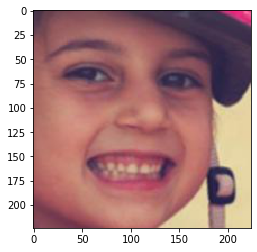

In [ ]:
c1=0
print("cluster 1")
for i in range(len(identified_clusters)):
  if(identified_clusters[i]==1) and (c1<5):
    plt.figure()
    plt.imshow(data[i].reshape(224,224,3))
    c1+=1
  if(c1==4):
    break
plt.show()

In [ ]:
count=[0,0,0]
print("cluster 2")
for i in range(len(identified_clusters)):
  if identified_clusters[i]==2:
    count[label[i]]+=1
count

cluster 2


[14, 65, 33]

cluster 2


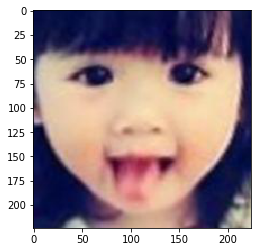

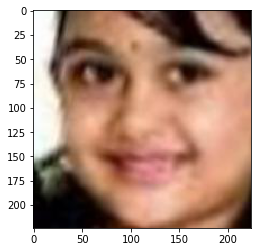

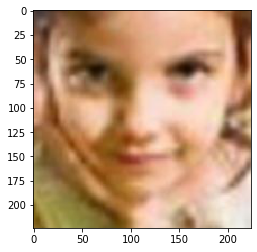

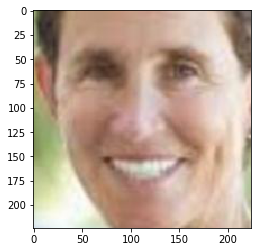

In [ ]:
c2=0
print("cluster 2")
for i in range(len(identified_clusters)):
  if(identified_clusters[i]==2) and (c2<5):
    plt.figure()
    plt.imshow(data[i].reshape(224,224,3))
    c2+=1
  if(c2==4):
    break
plt.show()

## facenet

In [ ]:
!pip install facenet-pytorch

     |████████████████████████████████| 1.9 MB 4.3 MB/s 


In [ ]:
from facenet_pytorch import InceptionResnetV1

In [ ]:
resnet=InceptionResnetV1(pretrained="vggface2").eval()

  0%|          | 0.00/107M [00:00<?, ?B/s]

In [ ]:
result=[]
for i in range(original.shape[0]):
  with torch.no_grad():
   temp=resnet(original[i].reshape((1,3,224,224))).squeeze(0)
   result.append(list(temp))

In [ ]:
result=np.array(result)
result.shape

(544, 512)

In [ ]:
scores3 = pca_model.fit_transform(result)

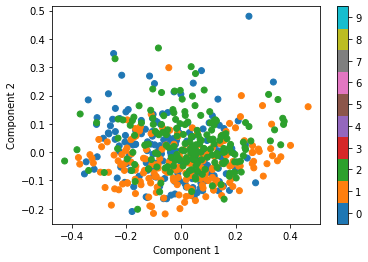

In [ ]:
visualize_components(scores3[:,0], scores3[:,1],label)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


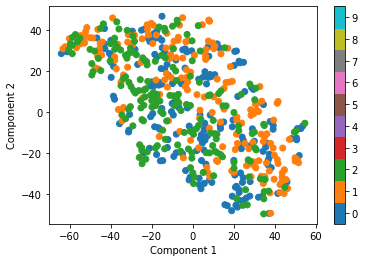

In [ ]:
tsne_model3 = TSNE(n_components=2, perplexity=15, random_state=2020,n_iter=5000) 
embed3 = tsne_model3.fit_transform(result)
visualize_components(embed3[:, 0], embed3[:, 1], label)

In [ ]:
pca20_3 = PCA(n_components = 20)
pca20_3.fit(result)
kmeans_20_3 = KMeans(
         init="random",
         n_clusters=3,
         n_init=10,
         max_iter=300,
         random_state=42
    )

In [ ]:
x3=pca20_3.transform(result)

In [ ]:
kmeans.fit(x3)
identified_clusters = kmeans.fit_predict(x3)
identified_clusters

array([2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 0, 1, 1, 2, 2, 1, 0, 1, 2,
       0, 2, 1, 1, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       2, 0, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2,
       2, 1, 2, 1, 0, 1, 2, 2, 1, 2, 2, 0, 2, 1, 2, 2, 0, 1, 0, 1, 1, 0,
       2, 2, 2, 2, 1, 1, 2, 0, 1, 2, 2, 1, 2, 1, 0, 2, 1, 1, 2, 2, 0, 1,
       1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 0, 2, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 0, 2, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 0, 0, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 0, 1, 1, 2, 0, 1, 1, 1, 2, 2,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 2, 2, 1, 0, 2, 0, 0,
       2, 0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 2, 1, 0, 2, 1, 0, 0, 1, 1, 0, 2, 2, 0, 1, 1, 1, 1, 2,
       2, 2, 2, 0, 2, 1, 1, 1, 0, 0, 2, 2, 1, 1, 1, 0, 1, 1, 1, 2, 0, 2,
       1, 0, 1, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
count=[0,0,0]
print("cluster 0")
for i in range(len(identified_clusters)):
  if identified_clusters[i]==0:
    count[label[i]]+=1
count

cluster 0


[25, 41, 58]

cluster 0


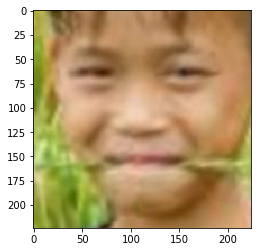

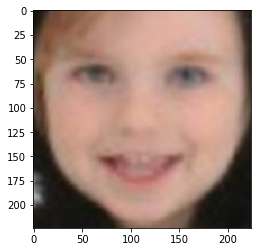

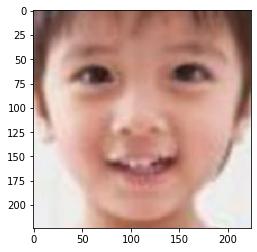

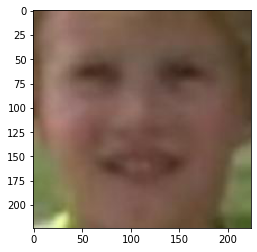

In [ ]:
c0=0
print("cluster 0")
for i in range(len(identified_clusters)):
  if(identified_clusters[i]==0) and (c0<5):
    plt.figure()
    plt.imshow(data[i].reshape(224,224,3))
    c0+=1
  if(c0==4):
    break
plt.show()

In [ ]:
count=[0,0,0]
print("cluster 1")
for i in range(len(identified_clusters)):
  if identified_clusters[i]==1:
    count[label[i]]+=1
count

cluster 1


[82, 83, 76]

cluster 1


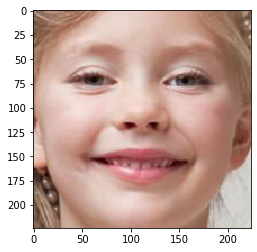

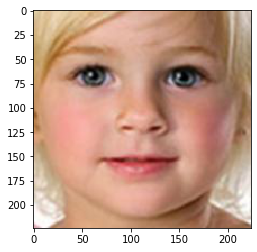

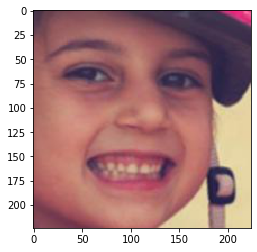

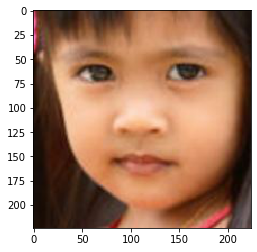

In [ ]:
c1=0
print("cluster 1")
for i in range(len(identified_clusters)):
  if(identified_clusters[i]==1) and (c1<5):
    plt.figure()
    plt.imshow(data[i].reshape(224,224,3))
    c1+=1
  if(c1==4):
    break
plt.show()

In [ ]:
count=[0,0,0]
print("cluster 2")
for i in range(len(identified_clusters)):
  if identified_clusters[i]==2:
    count[label[i]]+=1
count

cluster 2


[73, 57, 49]

cluster 2


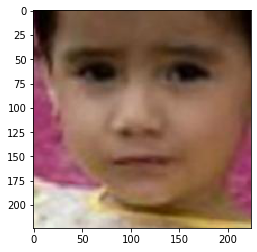

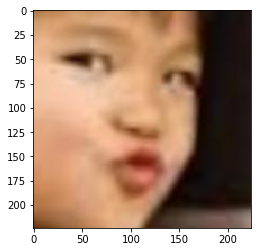

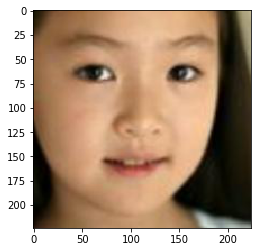

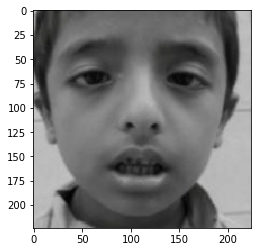

In [ ]:
c2=0
print("cluster 2")
for i in range(len(identified_clusters)):
  if(identified_clusters[i]==2) and (c2<5):
    plt.figure()
    plt.imshow(data[i].reshape(224,224,3))
    c2+=1
  if(c2==4):
    break
plt.show()